In [32]:
# Importing libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# reading the enriched csv
df = pd.read_csv('df_rich.csv')

# we have a categorical column (gas_type) but we had already categorilized it on the column "gas_type_coded"
# E10 = 0 /// SP98 = 1
df = df.drop(['gas_type'], axis = 1)

In [20]:
# split dataset in X and y for supervised learning
X = df.drop(['consume'], axis = 1)
y = df.consume

In [21]:
# split dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
# checking the split has been done correctly
print(f'X_train shape is:', X_train.shape)
print(f'y_train shape is:', y_train.shape)
print(f'X_test shape is:', X_test.shape)
print(f'y_test shape is:', y_test.shape)

X_train shape is: (310, 14)
y_train shape is: (310,)
X_test shape is: (78, 14)
y_test shape is: (78,)


In [55]:
# we decided to use different models
models = {"linear": LinearRegression(),
          "ridge": Ridge(),
          "lasso": Lasso(),
          "knn": KNeighborsRegressor(),
          "gradient": GradientBoostingRegressor(),
          "tree": DecisionTreeRegressor(),
          "forest": RandomForestRegressor()}

In [56]:
# we fit our models and get the metrics for each one
for name, model in models.items():
    print(f"--{name}--")
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
    print("MSE:", metrics.mean_squared_error(y_test,y_pred))
    print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print("R2:", metrics.r2_score(y_test,y_pred))

--linear--
MAE: 0.6993086614182854
MSE: 1.0192291365581876
RMSE: 1.0095687874326285
R2: 0.07208035296916637
--ridge--
MAE: 0.6943848485711954
MSE: 1.007533810386333
RMSE: 1.0037598370060106
R2: 0.08272793214841212
--lasso--
MAE: 0.6128975634381532
MSE: 0.9472299045868081
RMSE: 0.97325736811329
R2: 0.13762940324747863
--knn--
MAE: 0.47743589743589754
MSE: 0.48078974358974363
RMSE: 0.693390037128991
R2: 0.5622826770098224
--gradient--
MAE: 0.5417056684017252
MSE: 0.8872761324368232
RMSE: 0.9419533600114303
R2: 0.1922121080546081
--tree--
MAE: 0.6397435897435897
MSE: 1.1629487179487181
RMSE: 1.078401000532139
R2: -0.058763849234139576
--forest--
MAE: 0.45083653846153876
MSE: 0.5574143512784904
RMSE: 0.7466018693242673
R2: 0.4925226236811676


# Ridge model

### This model presents a very high fit with a R squared really near to 1 (0,998) and mean errors (MAE, MSE, RMSE) tending to zero

In [43]:
# Training the model again independently, in order to get a dataframe to plot
ridge = Ridge()
ridge = ridge.fit(X_train, y_train)
y_pred = model.predict(X_test)

ridge_df = pd.DataFrame({'gas_type':X_test['gas_type_coded'].apply(lambda x: 'E10' if x == 0 else 'SP98'),
                         'consume_real':y_test,
                         'consume_predicted': y_pred})
ridge_df.head()

,gas_type,consume_real,consume_predicted
216,SP98,4.1,4.100
210,SP98,11.5,10.518
6,E10,4.4,4.397
239,E10,4.5,4.497
266,E10,4.0,3.976


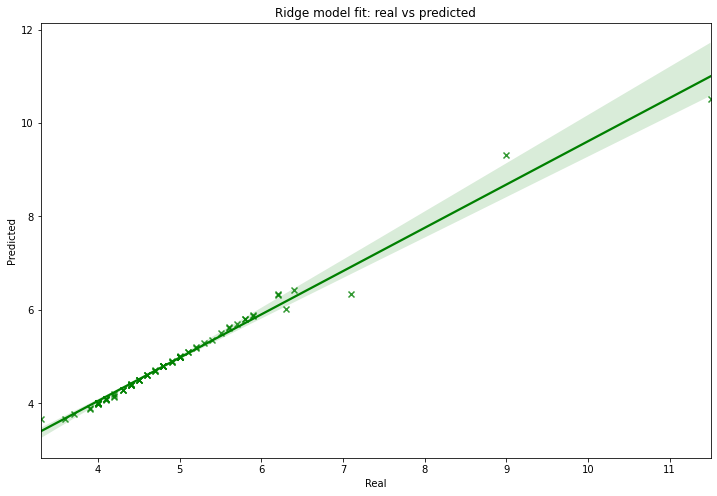

In [53]:
plt.figure(figsize = (12, 8))
ridge_plot = sns.regplot(x = ridge_df.consume_real,
            y = ridge_df.consume_predicted,
           color = 'g',
           marker = 'x')

ridge_plot.set(xlabel = 'Real', 
               ylabel = 'Predicted',
               title = 'Ridge model fit: real vs predicted');
plt.show()

### As Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where independent variables are highly correlated, we would like to check if it is so fitted because of the enrichment of the dataset. 

So we are replicating the previous code with the clean (but not enriched) dataset

In [57]:
# reading the clean csv (not enriched yet)
df = pd.read_csv('df_clean.csv')

# we have a categorical column (gas_type) but we had already categorilized it on the column "gas_type_coded"
# E10 = 0 /// SP98 = 1
df = df.drop(['gas_type'], axis = 1)

# split dataset in X and y for supervised learning
X = df.drop(['consume'], axis = 1)
y = df.consume

# split dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# we decided to use different models
models = {"linear": LinearRegression(),
          "ridge": Ridge(),
          "lasso": Lasso(),
          "knn": KNeighborsRegressor(),
          "gradient": GradientBoostingRegressor(),
          "tree": DecisionTreeRegressor(),
          "forest": RandomForestRegressor()}

# we fit our models and get the metrics for each one
for name, model in models.items():
    print(f"--{name}--")
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
    print("MSE:", metrics.mean_squared_error(y_test,y_pred))
    print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print("R2:", metrics.r2_score(y_test,y_pred))

--linear--
MAE: 0.7114846314477926
MSE: 1.3281897332958497
RMSE: 1.1524711420664076
R2: 0.11781140965650594
--ridge--
MAE: 0.7100041502464125
MSE: 1.3235873900979693
RMSE: 1.1504726811610824
R2: 0.12086830322843567
--lasso--
MAE: 0.6873340825740553
MSE: 1.3497063244987073
RMSE: 1.1617686191745358
R2: 0.10352000927416449
--knn--
MAE: 0.5148717948717949
MSE: 0.598205128205128
RMSE: 0.7734372167184147
R2: 0.6026699156317141
--gradient--
MAE: 0.4871859113345333
MSE: 0.6263100529718801
RMSE: 0.7913975315679725
R2: 0.5840025194456542
--tree--
MAE: 0.6974358974358973
MSE: 1.7035897435897431
RMSE: 1.305216358918989
R2: -0.13153068175863325
--forest--
MAE: 0.48776111111111053
MSE: 0.6044432926068368
RMSE: 0.7774595118762371
R2: 0.5985265034956947
